# Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read CSV

In [2]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [3]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [5]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# I don't thinkwe need to handle null?
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(["Attrition"], axis=1)
Y = df["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=12345)

### Display histogram of each feature

In [8]:
def display_histogram(df, col_name, n_bin = 40):
    # INSERT CODE HERE
    col_nonan = df[col_name][~np.isnan(df[col_name])]

    # col = np.array(df[col_name])
    # col_nonan = np.array( col[~ np.isnan(col)] )

    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edge = np.histogram(col_nonan, n_bin)
    bin_edge[0] = -np.inf
    bin_edge[-1] = np.inf

    # plot the histogram
    plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(col_name + " with " + str(n_bin) + " bins")
    plt.show()

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

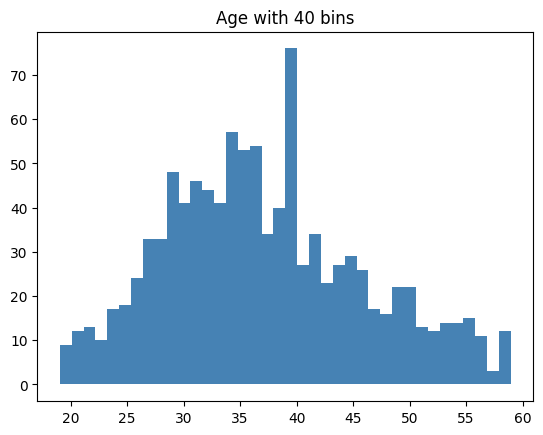

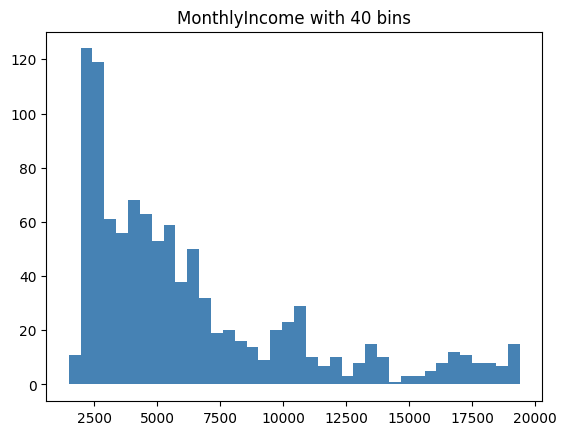

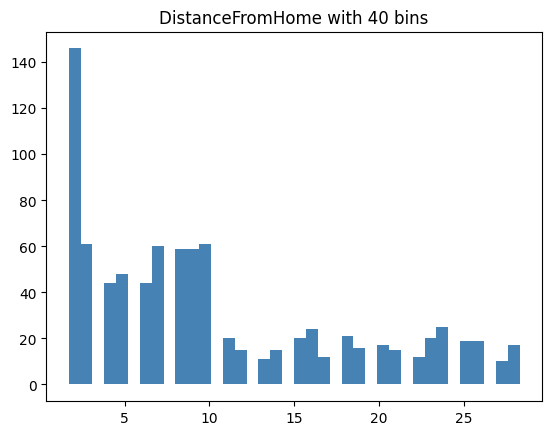

In [9]:
display_histogram(x_train, "Age")
display_histogram(x_train, "MonthlyIncome")
display_histogram(x_train, "DistanceFromHome")

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

    As 40 bins, Age and MonthlyIncome has no zero counts bin, 
    but DistanceFromHome have 11 bins with zero counts. I don't 
    think this is a good discretization because there are zero 
    counts bin which lead to probability of 0 due to less data.

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

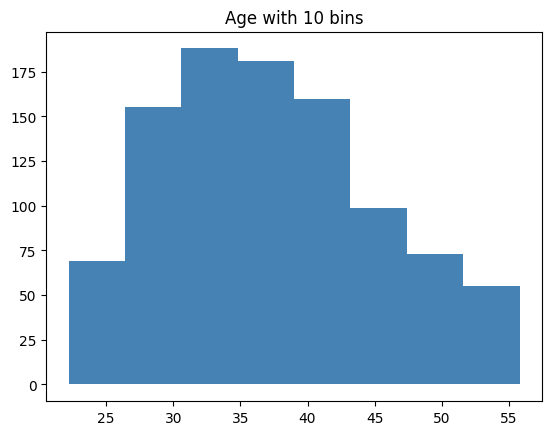

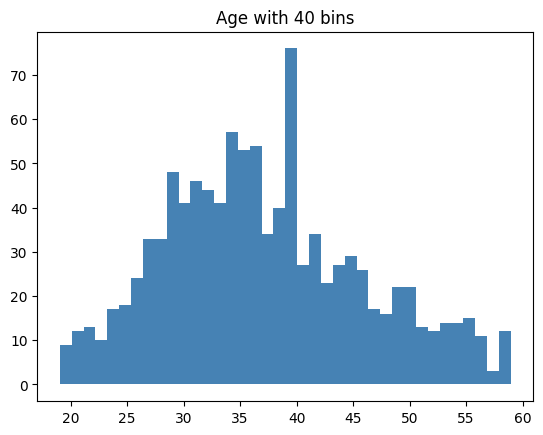

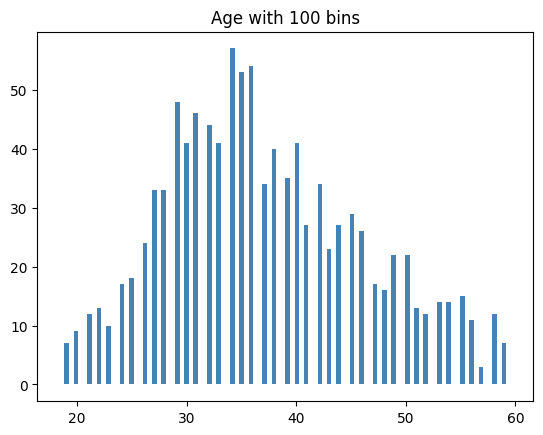

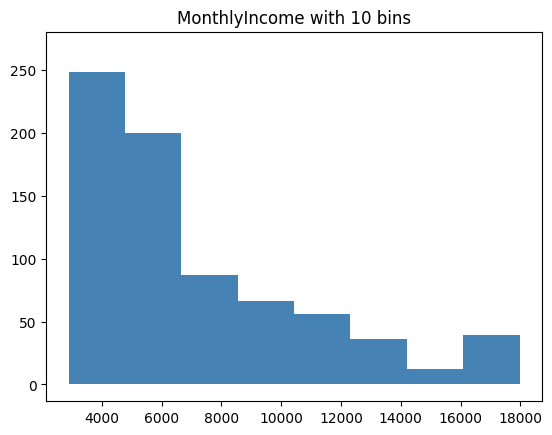

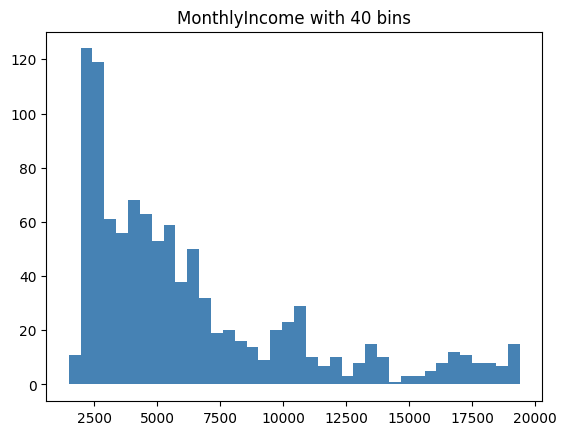

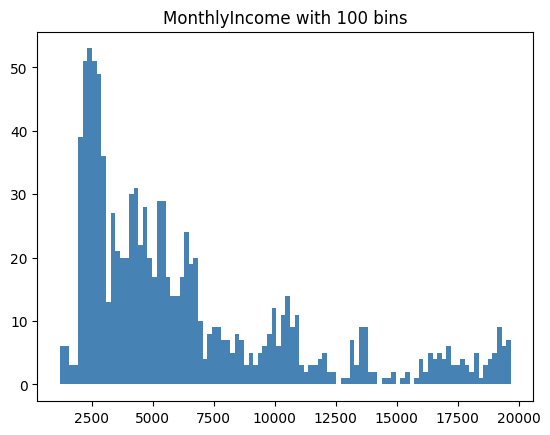

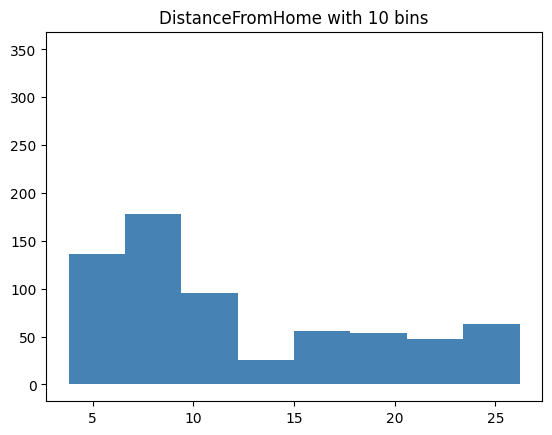

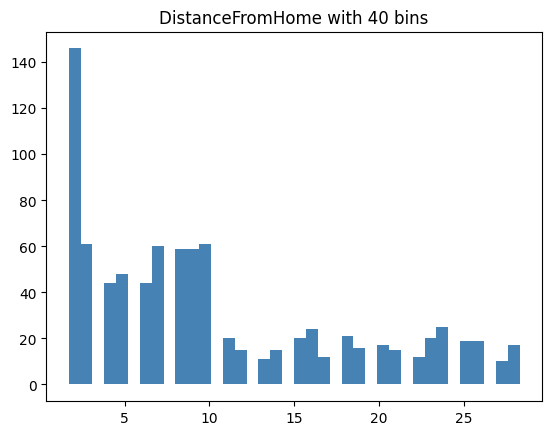

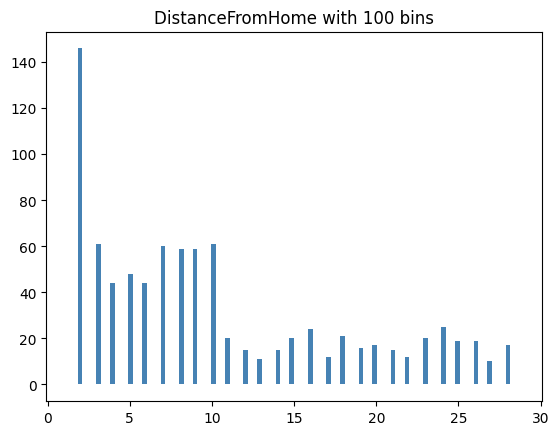

In [10]:
columns = ["Age", "MonthlyIncome", "DistanceFromHome"]
num_bins = [10, 40, 100]

for col in columns:
    for num in num_bins:
        display_histogram(x_train, col, num)

    For Age and MonthlyIncome:
    I think 40 bins is the best because there are no zero counts. 
    Well, 10 bins also doesn't have zero counts too, but you can 
    elaborate more details in the 40 bins. Anyway, the 100 bins 
    got some zero counts, so it isn't a good discretization.

    For DistanceFromHome:
    40 bins and 100 bins will both have a zero counts bin. 
    So that, the only good number of bins in these three are 10.

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

    First, the encoded from categorical values shouldn't be discretized 
    because the value is already discretized via the encoded function. 
    For me, what should be discretized is the one with continuous range 
    value or have many unique values. The threshold for considering if 
    that features should be discretized or not is > 40 (or any suit number) 
    unique values.

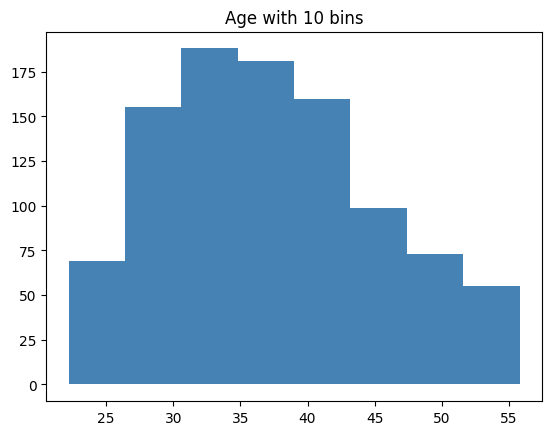

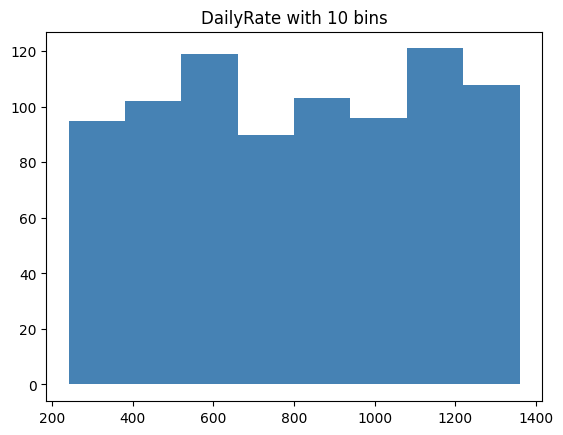

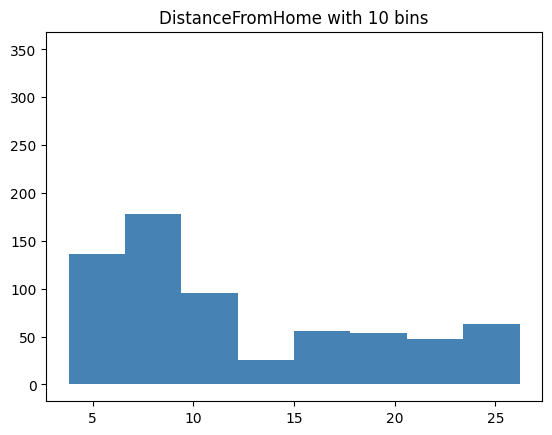

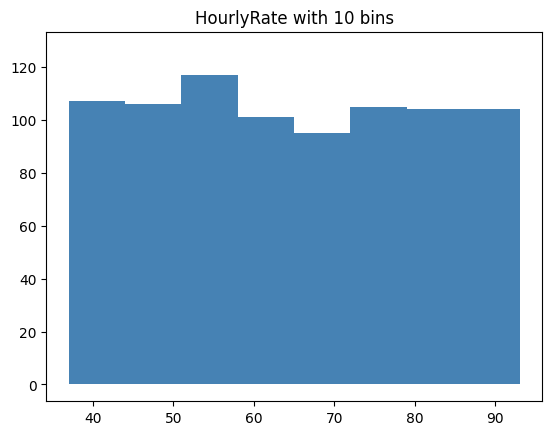

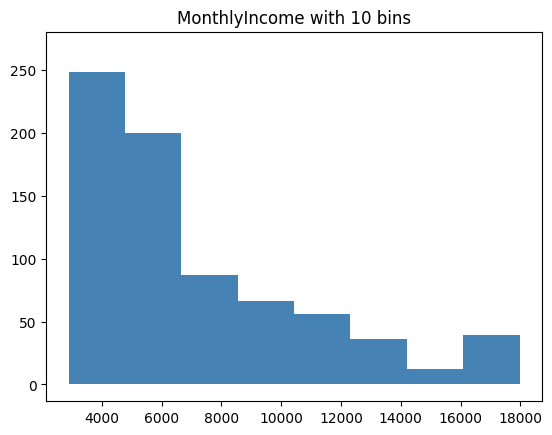

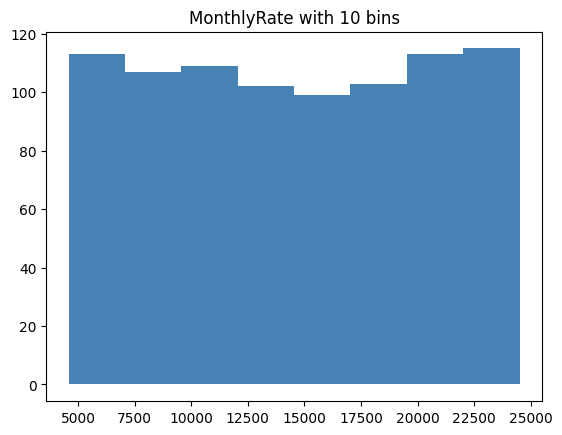

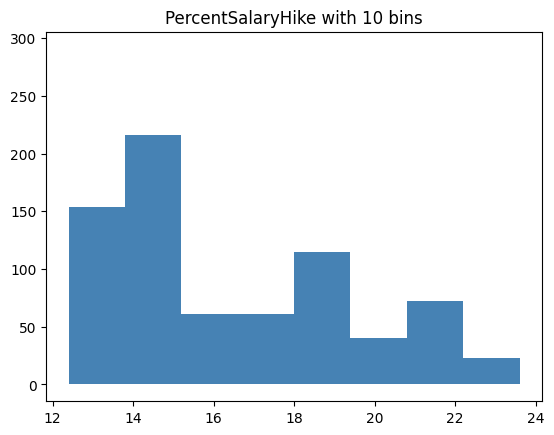

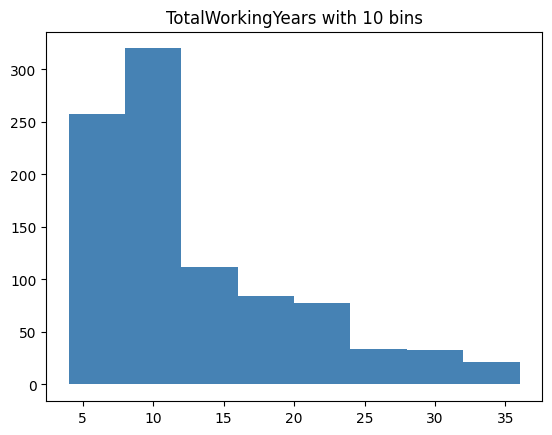

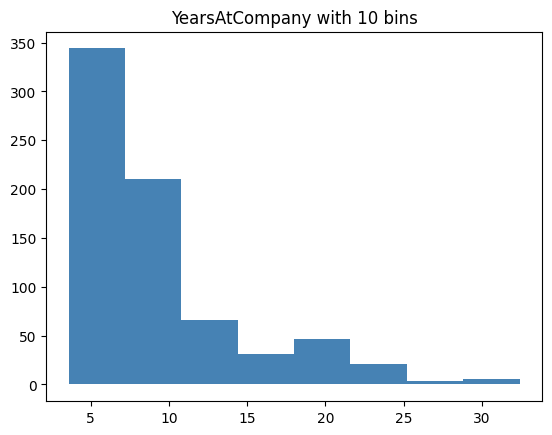

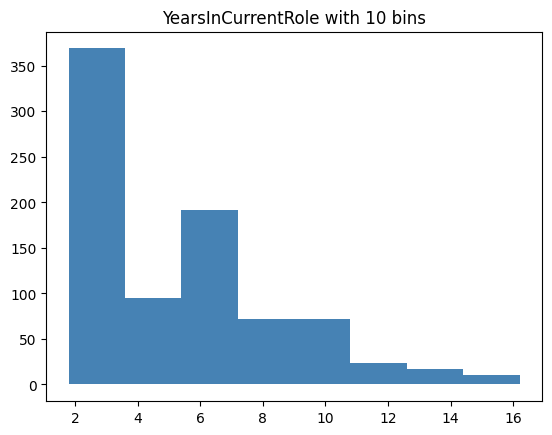

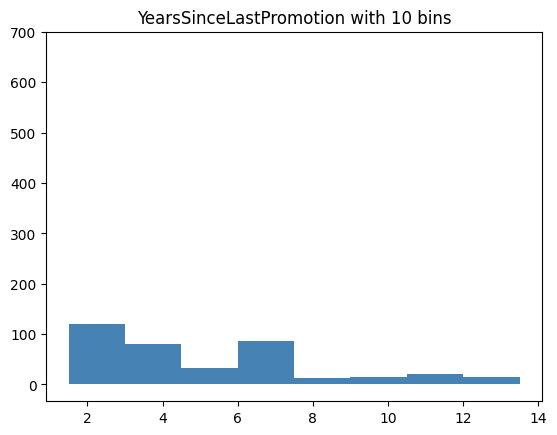

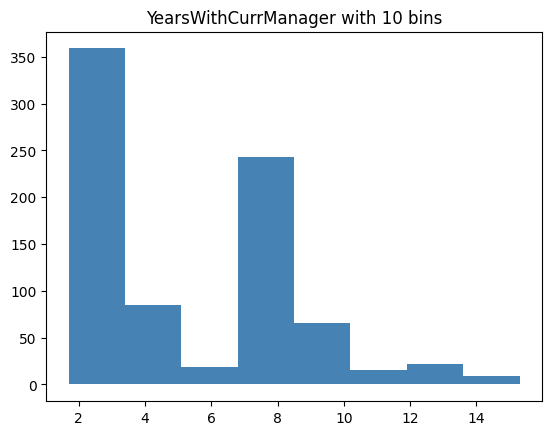

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [11]:
def hist(array, col_name, n_bin=10):
    nonan = array[~np.isnan(array)]

    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edges = np.histogram(nonan, n_bin)
    bin_edges[0] = -np.inf
    bin_edges[-1] = np.inf

    bin_indices = np.full_like(array, np.nan, dtype=float)
    bin_indices[~np.isnan(array)] = np.digitize(nonan, bin_edges)

    # plot the histogram
    plt.fill_between(bin_edges.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(col_name + " with " + str(n_bin) + " bins")
    plt.show()
    
    return bin_indices, bin_edges

discretize = []

for col in x_train.columns:
    if (x_train[col].nunique() > 10):
        x_train[col], _ = hist(x_train[col], col)
        discretize.append(col)

print(discretize)

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

    Multinomial distribution. As we mapped the value into different bins, 
    each bin can be treated as one category. The MLE for the probability 
    of each bin = number of data in that bin / number of all data

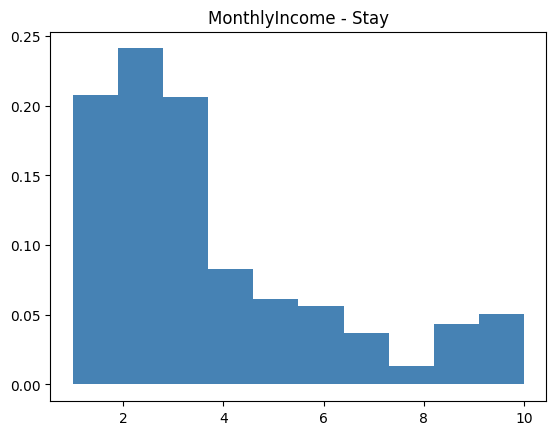

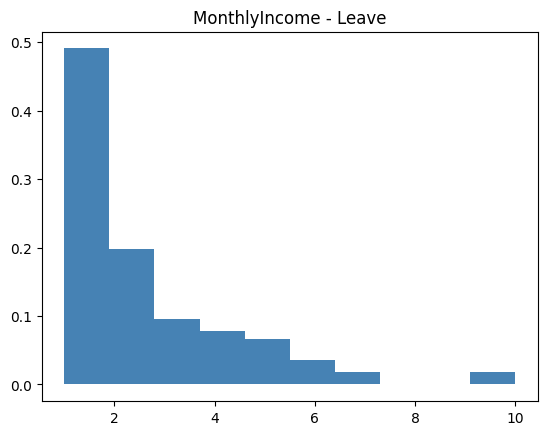

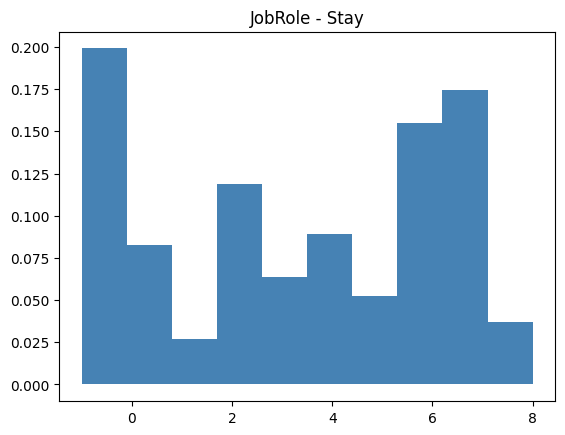

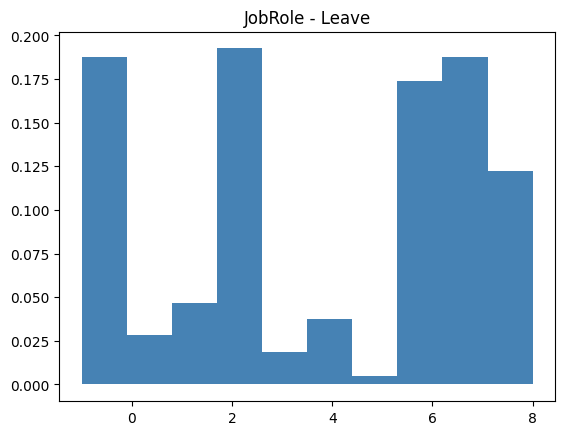

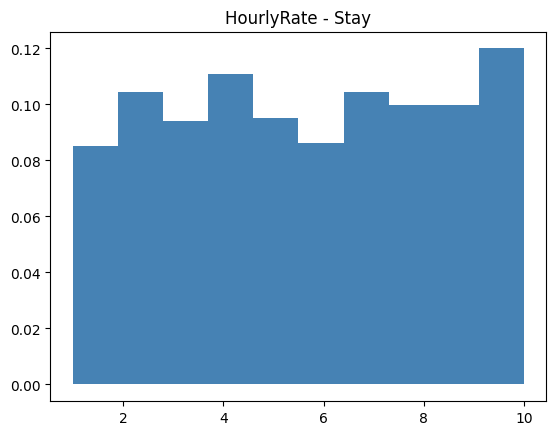

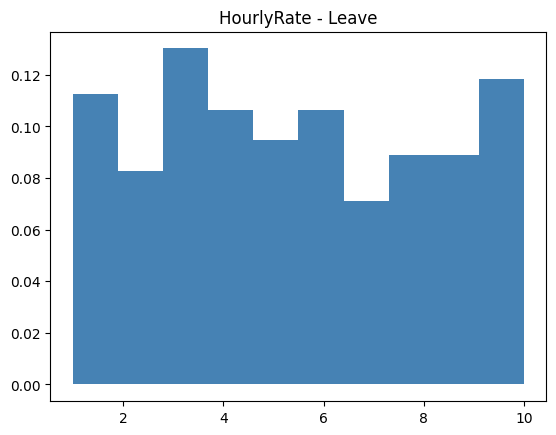

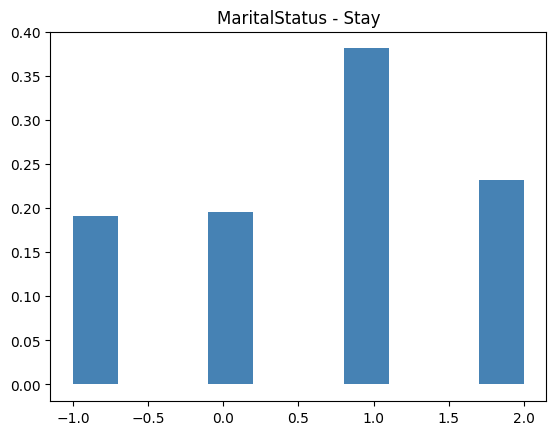

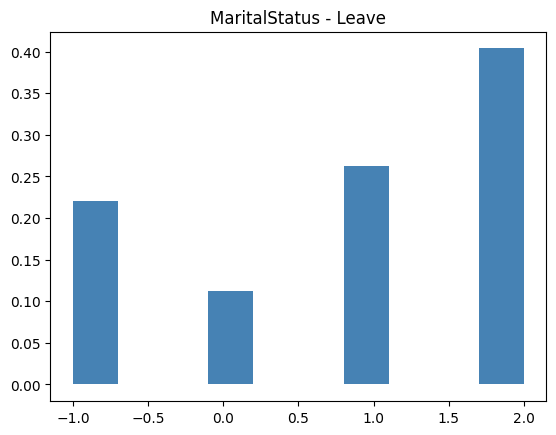

In [12]:
def plot_likelihood(x_train, y_train, col, n_bin=10):
    nonan_stay = x_train[y_train == 0][col].dropna()
    nonan_leave = x_train[y_train == 1][col].dropna()

    hist, bin_edges = np.histogram(nonan_stay)
    hist = hist / nonan_stay.shape[0]
    # plot the histogram
    plt.fill_between(bin_edges.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(f"{col} - Stay")
    plt.show()

    hist, bin_edges = np.histogram(nonan_leave)
    hist = hist / nonan_leave.shape[0]
    # plot the histogram
    plt.fill_between(bin_edges.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(f"{col} - Leave")
    plt.show()

cols = ["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]

for col in cols:
    plot_likelihood(x_train, y_train, col)

### T9. What is the prior distribution of the two classes?

In [13]:
stay = np.sum(y_train == 0)  / y_train.shape[0]
leave = np.sum(y_train == 1)  / y_train.shape[0]

print("Stay:", stay)
print("Leave:", leave)

Stay: 0.8390022675736961
Leave: 0.16099773242630386


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

    Inserting some small values (epsilon) would help preventing the probability to be zero.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [14]:
import importlib, SimpleBayesClassifier
importlib.reload(SimpleBayesClassifier)
from SimpleBayesClassifier import SimpleBayesClassifier

In [15]:
model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))

In [16]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (0.375, 0.625)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)
    
check_prior()

In [17]:
model.fit_params(np.array(x_train), np.array(y_train))

([(array([0.02581369, 0.05499439, 0.14253648, 0.17171717, 0.18181818,
          0.16498316, 0.09876543, 0.07182941, 0.05387205, 0.03367003]),
   array([-inf,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1,  inf])),
  (array([0.2027027 , 0.        , 0.        , 0.08558559, 0.        ,
          0.        , 0.13153153, 0.        , 0.        , 0.58018018]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.10961969, 0.08053691, 0.098434  , 0.11297539, 0.08501119,
          0.09619687, 0.0950783 , 0.11409396, 0.10738255, 0.10067114]),
   array([-inf,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1,  inf])),
  (array([0.19099099, 0.        , 0.        , 0.03603604, 0.        ,
          0.        , 0.54594595, 0.        , 0.        , 0.22702703]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.34698521, 0.13083049, 0.17406143, 0.08987486, 0.02275313,
          0.04778157, 0.05119454, 0.04095563, 

In [18]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]

LEAVE PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  4.2  4.4

In [19]:
x_test_np = np.array(x_test)
y_pred = np.array(model.predict(x = x_test_np))

In [20]:
y_pred.shape

(147,)

In [21]:
def evaluate(y_true, y_pred, show_result = True):
    if (y_true.shape[0] != y_pred.shape[0]):
        return -1, -1, -1, -1
    
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    F1 = 2 / (1 / precision + 1 / recall) 
    fpr = (fp) / (fp + tn)

    if (show_result):
        print(f"Accuracy: {accuracy * 100}%\nPrecision: {precision}\nRecall: {recall}\nF1: {F1}\nFPR: {fpr}\n")
        
    return accuracy, precision, recall, F1, fpr

In [22]:
evaluate(np.array(y_test), y_pred)

Accuracy: 80.95238095238095%
Precision: 0.375
Recall: 0.25
F1: 0.30000000000000004
FPR: 0.08130081300813008



(np.float64(0.8095238095238095),
 np.float64(0.375),
 np.float64(0.25),
 np.float64(0.30000000000000004),
 np.float64(0.08130081300813008))

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [23]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes
# HANDLE NULL NUMBERS
# I don't think we need to handle null?

# INSERT CODE HERE
df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])] # drop these columns

X = df.drop(["Attrition"], axis=1)
Y = df["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=12345)

In [24]:
model.fit_gaussian_params(np.array(x_train), np.array(y_train))

([(np.float64(37.809203142536475), np.float64(8.896433952739484)),
  (np.float64(1.0891891891891892), np.float64(1.2118670987811953)),
  (np.float64(808.728187919463), np.float64(407.2251752337319)),
  (np.float64(0.809009009009009), np.float64(0.9952635170583247)),
  (np.float64(9.0773606370876), np.float64(8.112178479155704)),
  (np.float64(2.9395667046750287), np.float64(1.0218798132530393)),
  (np.float64(1.6054054054054054), np.float64(1.7453071098573252)),
  (np.float64(2.755826859045505), np.float64(1.0796687888712027)),
  (np.float64(0.2594594594594595), np.float64(0.7706763588940992)),
  (np.float64(65.53699551569507), np.float64(20.404589827789692)),
  (np.float64(2.7610419026047563), np.float64(0.6885077018805345)),
  (np.float64(2.179749715585893), np.float64(1.120498601502818)),
  (np.float64(3.324324324324324), np.float64(3.076684076050504)),
  (np.float64(2.7587768969422424), np.float64(1.0964885160093172)),
  (np.float64(0.6549549549549549), np.float64(1.035777876178939

In [25]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [26]:
y_pred = model.gaussian_predict(np.array(x_test))

In [27]:
evaluate(y_test, y_pred)

Accuracy: 81.63265306122449%
Precision: 0.45161290322580644
Recall: 0.5833333333333334
F1: 0.509090909090909
FPR: 0.13821138211382114



(np.float64(0.8163265306122449),
 np.float64(0.45161290322580644),
 np.float64(0.5833333333333334),
 np.float64(0.509090909090909),
 np.float64(0.13821138211382114))

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [28]:
y_random_pred = np.random.default_rng(seed=12345).random(y_test.shape)

In [29]:
y_random_pred

array([0.22733602, 0.31675834, 0.79736546, 0.67625467, 0.39110955,
       0.33281393, 0.59830875, 0.18673419, 0.67275604, 0.94180287,
       0.24824571, 0.94888115, 0.66723745, 0.09589794, 0.44183967,
       0.88647992, 0.6974535 , 0.32647286, 0.73392816, 0.22013496,
       0.08159457, 0.1598956 , 0.34010018, 0.46519315, 0.26642103,
       0.8157764 , 0.19329439, 0.12946908, 0.09166475, 0.59856801,
       0.8547419 , 0.60162124, 0.93198836, 0.72478136, 0.86055132,
       0.9293378 , 0.54618601, 0.93767296, 0.49498794, 0.27377318,
       0.45177871, 0.66503892, 0.33089093, 0.90345401, 0.25707418,
       0.33982834, 0.2588534 , 0.35544648, 0.00502233, 0.62860454,
       0.28238271, 0.06808769, 0.61682898, 0.17632632, 0.30438839,
       0.44088681, 0.15020234, 0.21792886, 0.47433312, 0.47636886,
       0.25523235, 0.29756527, 0.27906712, 0.26057921, 0.48276159,
       0.21197904, 0.4956306 , 0.24626133, 0.83848265, 0.18013059,
       0.86215629, 0.17829944, 0.75053133, 0.6111204 , 0.20915

In [30]:
y_random_pred[y_random_pred >= 0.5] = 1
y_random_pred[y_random_pred < 0.5] = 0

In [31]:
y_random_pred

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.])

In [32]:
evaluate(y_test, y_random_pred)

Accuracy: 54.421768707483%
Precision: 0.13559322033898305
Recall: 0.3333333333333333
F1: 0.1927710843373494
FPR: 0.4146341463414634



(np.float64(0.54421768707483),
 np.float64(0.13559322033898305),
 np.float64(0.3333333333333333),
 np.float64(0.1927710843373494),
 np.float64(0.4146341463414634))

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [33]:
print("Leave:", np.sum(y_train == 1))
print("Stay:", np.sum(y_train == 0))
print("Stay (0) is the majority class")
y_major_pred = np.zeros(y_pred.shape)

Leave: 213
Stay: 1110
Stay (0) is the majority class


In [34]:
y_major_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
evaluate(y_test, y_major_pred)

Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0



C:\Users\chyut\AppData\Local\Temp\ipykernel_17200\297337688.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = (tp) / (tp + fp)
C:\Users\chyut\AppData\Local\Temp\ipykernel_17200\297337688.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  F1 = 2 / (1 / precision + 1 / recall)


(np.float64(0.8367346938775511),
 np.float64(nan),
 np.float64(0.0),
 np.float64(nan),
 np.float64(0.0))

### T15. Compare the two baselines with your Naive Bayes classifier.


    Mine's accuracy is more than the random baseline, but a little bit less than the stupid baseline. 
    But, the stupid baseline precision is 0 which mine's is better.

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [ ]:
t = np.arange(-5, 5, 0.05)
maxaccuracy = -1
maxf1 = -1
maxthresholdacc = -10
maxthresholdf1 = -10

history = {}
history["Accuracy"] = []
history["Precision"] = []
history["Recall"] = []
history["F1"] = []
history["FPR"] = []

for each in t:
    print("--- Threshold =", each, "---")
    y_pred = model.gaussian_predict(np.array(x_test), thresh=each)

    accuracy, precision, recall, f1, fpr = evaluate(y_test, y_pred)

    history["Accuracy"].append(accuracy)
    history["Precision"].append(precision)
    history["Recall"].append(recall)
    history["F1"].append(f1)
    history["FPR"].append(fpr)

    if (accuracy > maxaccuracy):
        maxaccuracy = accuracy
        maxthresholdacc = each
    if (f1 > maxf1):
        maxf1 = f1
        maxthresholdf1 = each
print("Best Accuracy:", maxaccuracy, "with responding threshold:", maxthresholdacc)
print("Best F1:", maxf1, "with responding threshold:", maxthresholdf1)

--- Threshold = -5.0 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Threshold = -4.95 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Threshold = -4.9 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Threshold = -4.8500000000000005 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Threshold = -4.800000000000001 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Threshold = -4.750000000000001 ---
Accuracy: 27.2108843537415%
Precision: 0.1732283464566929
Recall: 0.9166666666666666
F1: 0.2913907284768212
FPR: 0.8536585365853658

--- Thre

C:\Users\chyut\AppData\Local\Temp\ipykernel_24836\297337688.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  F1 = 2 / (1 / precision + 1 / recall)


Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.2499999999999742 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.299999999999974 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.349999999999974 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.3999999999999737 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.4499999999999735 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.4999999999999734 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 2.549999999999973 ---
Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--

C:\Users\chyut\AppData\Local\Temp\ipykernel_24836\297337688.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = (tp) / (tp + fp)


Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.6999999999999726 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.7499999999999725 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.7999999999999723 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.849999999999972 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.899999999999972 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.9499999999999718 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 2.9999999999999716 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 3.0499999999999723 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 3.099999999999971

### T17. Plot the RoC of your classifier.

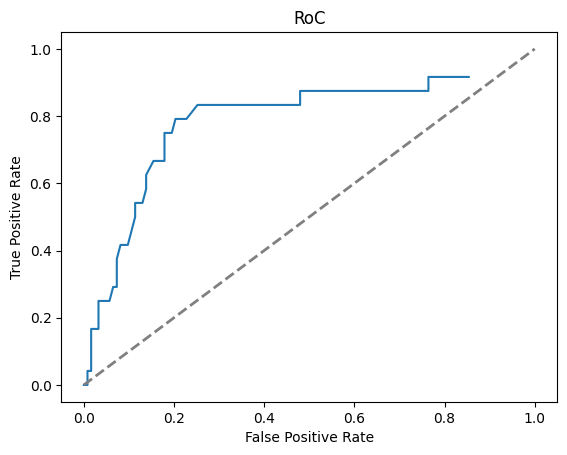

In [ ]:
plt.plot(history["FPR"], history["Recall"])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC")
plt.show()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [37]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes
# HANDLE NULL NUMBERS
# I don't think we need to handle null?

# INSERT CODE HERE
df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])] # drop these columns
X = df.drop(["Attrition"], axis=1)
Y = df["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=12345)

In [38]:
def hist(array, col_name, n_bin=10):
    nonan = array[~np.isnan(array)]

    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edges = np.histogram(nonan, n_bin)
    bin_edges[0] = -np.inf
    bin_edges[-1] = np.inf

    bin_indices = np.full_like(array, np.nan, dtype=float)
    bin_indices[~np.isnan(array)] = np.digitize(nonan, bin_edges)

    return bin_indices, bin_edges

discretize = []

for col in x_train.columns:
    if (x_train[col].nunique() > 10):
        x_train[col], _ = hist(x_train[col], col, 5)
        discretize.append(col)

print(discretize)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [39]:
import importlib, SimpleBayesClassifier
importlib.reload(SimpleBayesClassifier)
from SimpleBayesClassifier import SimpleBayesClassifier

model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))

model.fit_params(np.array(x_train), np.array(y_train))

([(array([0.08080808, 0.        , 0.31425365, 0.        , 0.        ,
          0.34680135, 0.        , 0.17059484, 0.        , 0.08754209]),
   array([-inf,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  inf])),
  (array([0.2027027 , 0.        , 0.        , 0.08558559, 0.        ,
          0.        , 0.13153153, 0.        , 0.        , 0.58018018]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.1901566 , 0.        , 0.2114094 , 0.        , 0.        ,
          0.18120805, 0.        , 0.20917226, 0.        , 0.20805369]),
   array([-inf,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  inf])),
  (array([0.19099099, 0.        , 0.        , 0.03603604, 0.        ,
          0.        , 0.54594595, 0.        , 0.        , 0.22702703]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.4778157 , 0.        , 0.26393629, 0.        , 0.        ,
          0.0705347 , 0.        , 0.09215017, 

--- Threshold = -5.0 ---
Accuracy: 50.34013605442177%
Precision: 0.24210526315789474
Recall: 0.9583333333333334
F1: 0.3865546218487395
FPR: 0.5853658536585366

--- Threshold = -4.95 ---
Accuracy: 50.34013605442177%
Precision: 0.24210526315789474
Recall: 0.9583333333333334
F1: 0.3865546218487395
FPR: 0.5853658536585366

--- Threshold = -4.9 ---
Accuracy: 51.70068027210885%
Precision: 0.24731182795698925
Recall: 0.9583333333333334
F1: 0.39316239316239315
FPR: 0.5691056910569106

--- Threshold = -4.8500000000000005 ---
Accuracy: 51.70068027210885%
Precision: 0.24731182795698925
Recall: 0.9583333333333334
F1: 0.39316239316239315
FPR: 0.5691056910569106

--- Threshold = -4.800000000000001 ---
Accuracy: 52.38095238095239%
Precision: 0.25
Recall: 0.9583333333333334
F1: 0.396551724137931
FPR: 0.5609756097560976

--- Threshold = -4.750000000000001 ---
Accuracy: 54.421768707483%
Precision: 0.25842696629213485
Recall: 0.9583333333333334
F1: 0.40707964601769914
FPR: 0.5365853658536586

--- Thresho

C:\Users\chyut\AppData\Local\Temp\ipykernel_17200\297337688.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  F1 = 2 / (1 / precision + 1 / recall)


Accuracy: 82.99319727891157%
Precision: 0.0
Recall: 0.0
F1: 0.0
FPR: 0.008130081300813009

--- Threshold = 0.5999999999999801 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.6499999999999799 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.6999999999999797 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.7499999999999796 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.7999999999999794 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.8499999999999792 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.899999999999979 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.9499999999999789 ---


C:\Users\chyut\AppData\Local\Temp\ipykernel_17200\297337688.py:11: RuntimeWarning: invalid value encountered in scalar divide
  precision = (tp) / (tp + fp)


Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 0.9999999999999787 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.0499999999999785 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.0999999999999783 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.1499999999999782 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.199999999999978 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.2499999999999778 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.2999999999999776 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.3499999999999774 ---
Accuracy: 83.6734693877551%
Precision: nan
Recall: 0.0
F1: nan
FPR: 0.0

--- Threshold = 1.39999999999997

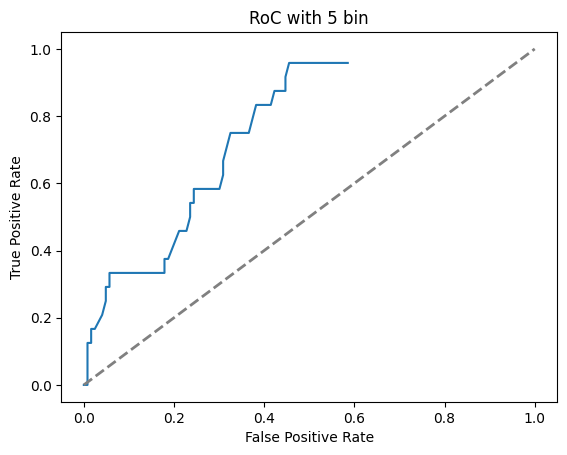

In [41]:
t = np.arange(-5, 5, 0.05)
hbin5 = {}
hbin5["Accuracy"] = []
hbin5["Precision"] = []
hbin5["Recall"] = []
hbin5["F1"] = []
hbin5["FPR"] = []

for each in t:
    print("--- Threshold =", each, "---")
    y_pred = np.array(model.predict(np.array(x_test), thresh=each))

    accuracy, precision, recall, f1, fpr = evaluate(y_test, y_pred)

    hbin5["Accuracy"].append(accuracy)
    hbin5["Precision"].append(precision)
    hbin5["Recall"].append(recall)
    hbin5["F1"].append(f1)
    hbin5["FPR"].append(fpr)

plt.plot(hbin5["FPR"], hbin5["Recall"])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC with 5 bin")
plt.show()

### OT4

In [ ]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

for col in string_categorical_col:
    df[col] = pd.Categorical(df[col]).codes

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])] # drop these columns
X = df.drop(["Attrition"], axis=1)
Y = df["Attrition"]

accuracies = []

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1)

    def hist(array, col_name, n_bin=10):
        nonan = array[~np.isnan(array)]

        # hist is the count for each bin
        # bin_edge is the edge values of the bins
        hist, bin_edges = np.histogram(nonan, n_bin)
        bin_edges[0] = -np.inf
        bin_edges[-1] = np.inf

        bin_indices = np.full_like(array, np.nan, dtype=float)
        bin_indices[~np.isnan(array)] = np.digitize(nonan, bin_edges)

        return bin_indices, bin_edges

    discretize = []

    for col in x_train.columns:
        if (x_train[col].nunique() > 10):
            x_train[col], _ = hist(x_train[col], col, 5)
            discretize.append(col)

    import importlib, SimpleBayesClassifier
    importlib.reload(SimpleBayesClassifier)
    from SimpleBayesClassifier import SimpleBayesClassifier

    model = SimpleBayesClassifier(n_pos = np.sum(y_train == 1), n_neg = np.sum(y_train == 0))

    model.fit_gaussian_params(np.array(x_train), np.array(y_train))
    y_pred = model.gaussian_predict(np.array(x_test))

    accuracy, _, _, _, _ = evaluate(np.array(y_test), y_pred, False)

    accuracies.append(accuracy)

accuracies = np.array(accuracies)
print("Mean:", np.mean(accuracies))
print("Variance:", np.std(accuracies) ** 2)

Mean: 0.8251700680272108
Variance: 0.00042621130084686886
